**Descripción del proyecto**

Zuber,  una nueva empresa de viajes compartidos que se está lanzando en Chicago necesita conocer las preferencias de los pasajeros y el impacto de los factores externos, como el clima, en los viajes.

**Descripción de las columnas**

__- /datasets/project_sql_result_01.csv. contiene los siguientes datos:__
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

__- /datasets/project_sql_result_04.csv. contiene los siguientes datos:__
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

__-/datasets/project_sql_result_07.csv contiene los siguientes datos:__
- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

*Indice de contenidos*

- [1. Inicialización: Importar librerías](#1-inicialización-importar-librerías)
- [2. Cargar los datos: lectura de los archivos CSV](#2-cargar-los-datos-lectura-de-los-archivos-csv)
- [3. Descripción de los datos](#3-descripción-de-los-datos)
- [4. Análisis exploratorio de datos](#4-análisis-exploratorio-de-datos)
- [5. Pruebas de hipótesis](#5-pruebas-de-hipótesis)
- [6. Conclusiones](#6-conclusiones)

# 1. Inicialización: Importar librerías 

Antes de comenzar, se cargan las librerías pandas, numpy, scipy y matplotlib.

In [27]:
import pandas as pd
import numpy as np 
from scipy import stats as st
from matplotlib import pyplot as plt

# 2.Cargar los datos: lectura de los archivos csv

Los datos provienen de dos dataframe que se cargan a continuación. El primero, llamado df_trips contiene datos sobre los viajes de cada compañía de taxis, mientras que el segundo, llamado df_neighborhoods, contiene datos sobre los vecindarios de Chicago y su promedio de viajes. También se leerá un tercer dataframe, pero este no será utilizado hasta el momento de probar una hipótesis.

In [28]:
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')    
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

# 3.Descripción de los datos

A continuación se revisarán los dataframes iniciales, haciendo correcciones de estos si se considera necesario como parte del preprocesamiento de datos. Para comenzar, se usarán los métodos info() y describe() junto con la impresión de una muestra del dataframe realizada con head(). Dichos elementos entregarán un buen resumen de los dataframes.

*Viajes*

In [29]:
df_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [30]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [31]:
df_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


El dataframe de viajes contiene 64 filas y dos columnas: company_name y trips_amount. No hay valores ausentes y el tipo de datos es correcto. La media de viajes es de 2145. La compañía con menos viajes tiene tan solo dos viajes, mientras que la con más viajes registra más de 2000, lo que explica la alta desviación estándar.

*Vecindarios*

In [32]:
df_neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [33]:
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [34]:
df_neighborhoods.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


El dataframe de vecindarios tiene 94 filas y dos columnas que indican el barrio donde se baja el pasajero y el promedio de viajes que terminaron en cada barrio de Chicago. No hay datos ausentes pero se cambiaran los datos sobre average_trips a números enteros ya que al ser ya un dato promedio, será más simple de analizar que como número de coma flotante.

In [35]:
df_neighborhoods['average_trips'] = df_neighborhoods['average_trips'].astype(int)

In [36]:
df_neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


Finalmente, se verificará que no existan datos duplicados en los dataframes.

In [37]:
df_trips.duplicated().sum()

0

In [38]:
df_neighborhoods.duplicated().sum()

0

No hay datos duplicados en ninguno de los dataframes por lo que se proseguirá con el análisis exploratorio de datos.

# 4.Análisis exploratorio de datos

A continuación se identificarán los 10 principales barrios en términos de finalización de recorrido, usando el método sort_values().

In [39]:
top_10_neighborhoods = df_neighborhoods.sort_values('average_trips', ascending=False).head(10)
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [65]:
total_dropoffs = df_neighborhoods['average_trips'].sum()
df_neighborhoods['dropoff_percentage'] = (df_neighborhoods['average_trips'] / total_dropoffs) * 100
top_10_neighborhoods_percentage = df_neighborhoods.sort_values('dropoff_percentage', ascending=False).head(10)
top_10_neighborhoods_percentage

,dropoff_location_name,average_trips,dropoff_percentage
0,Loop,10727,19.036042
1,River North,9523,16.899434
2,Streeterville,6664,11.825877
3,West Loop,5163,9.162215
4,O'Hare,2546,4.518110
5,Lake View,2420,4.294511
6,Grant Park,2068,3.669855
7,Museum Campus,1510,2.679633
8,Gold Coast,1364,2.420543
9,Sheffield & DePaul,1259,2.234211


El vecindario Loop es donde terminan casi un 20% de los viajes. El segundo vecindario más popular es River North con casi un 17% de los viajes, seguido por Streetervlle y West Loop. Los barrios menos populares (dentro de la lista de los 10 más populares) son Museum Campus, Gold Coast y Sheffield and DePaul.

Para visualizar mejor esta información, a continuación se representa de forma gráfica los 10 barrios más populares para la finalización de recorridos de pasajeros.

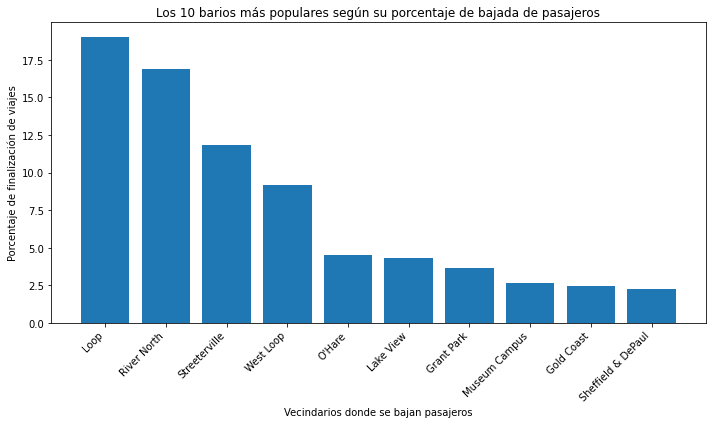

In [68]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods_percentage['dropoff_percentage'])
plt.xlabel('Vecindarios donde se bajan pasajeros')
plt.ylabel('Porcentaje de finalización de viajes')
plt.title('Los 10 barios más populares según su porcentaje de bajada de pasajeros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Ya que conocemos cuáles son los diez barrios más populares para la finalización de los recorridos, sería interesante también conocer cuáles son las diez empresas líderes según en el mercado según su cantidad de viajes.

In [70]:
df_trips = df_trips.sort_values(by='trips_amount', ascending=False)

top_10_companies
top_10_companies.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Para hacer dicha información más legible, se creará un gráfico de barras donde el eje y muestra el nombre de la empresa y el eje x la cantidad de viajes.

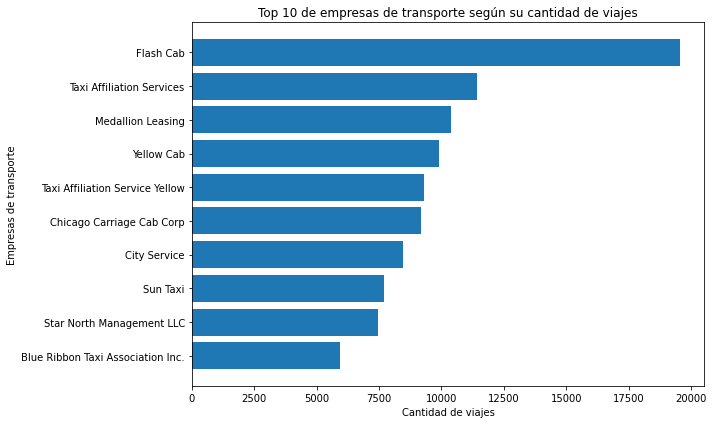

In [53]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_companies['company_name'], top_10_companies['trips_amount'])
plt.xlabel('Cantidad de viajes')
plt.ylabel('Empresas de transporte')
plt.title('Top 10 de empresas de transporte según su cantidad de viajes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

A partir del gráfico, se observa quela empresa líder, con una mayor cantidad de viajes por lejos, llegando casi a los 20.000 es Flash Cab, seguida por las empresas Taxi Affiliation Services, Medallion Leasing, Yellow Cab y Taxi Affiliation Service Yellow. 

# 5.Pruebas de hipótesis

Se busca probar la hipótesis que afirma que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Antes de comenzar con la prueba de hipótesis, se imprimirá una muestra del dataframe recuperado mediante SQL y se revisará el tipo de datos para verificar que sean correctos.

In [56]:
df_weather

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [57]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se convertirá la columna start_ts a to_datetime para poder extraer el día de la semana.

In [58]:
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])

Finalmente se agregará la columna día de la semana y se verificará que nuestro dataframe solo contenga información del día sábado usando el método unique().

In [59]:
df_weather['day_of_week'] = df_weather['start_ts'].dt.day_name()

In [60]:
df_weather.head()

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


In [61]:
df_weather['day_of_week'].unique()

array(['Saturday'], dtype=object)

### Planteamiento de hipótesis

H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días sábados lluviosos es igual a los días sábado de buen clima.

H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días sábados lluviosos es distinta a los días sábado de buen clima.

### Valor del nivel de significación

Se establece un nivel de confianza del 95%, es decir, un valor de alpha de 0.05.

### Pruebas estadísticas

Se usará el paquete scipy.stats para probar la hipótesis de que las medias de dos poblaciones estadísticamente distintas son iguales. 

In [62]:
sample_1 = df_weather[df_weather['weather_conditions'] == 'Good'].dropna()['duration_seconds']
sample_2 = df_weather[df_weather['weather_conditions'] == 'Bad'].dropna()['duration_seconds']

In [63]:
st.levene(sample_1, sample_2)

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

El valor de p es mayor al 5%, por lo que probablemente las varianzas de ambas poblaciones son iguales, por lo que el parámetro equal_var tomará el valor "True".

In [64]:
alpha = 0.05 

results = st.ttest_ind(
                        sample_1, 
                        sample_2, 
                        equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("Se rechaza la hipótesis nula")
else:
        print("No se rechaza la hipótesis nula")

p-value:  6.517970327099473e-12
Se rechaza la hipótesis nula


La prueba de hipótesis arroja un valor significativo de p, por lo que se rechaza la hipótesis nula en favor de la hipotésis alternativa, es decir, se observan cambios en la media de la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días sábados lluviosos.

# 6.Conclusiones

En este reporté se analizó la conducta de los pasajeros para identificar patrones sobre su comportamiento y el efecto de factores externos en los viajes compartidos que realizan.

En primer lugar, se llevó a cabo la importación de las librerías pandas, numpy, scipy y matplotlib y la lectura de tres archivos csv. 
Luego, se hizo un preprocesamiento de datos que mostró que no habían datos duplicados ni datos ausentes en los dataframes. Solo se convirtió el tipo de datos para average_trips a integer.
El análisis exploratorio de datos mostró que Loop es el vecindario donde terminan la mayoría de los trayectos, seguido por River North. Además, se observa una gran cantidad de compañías de taxis ofreciendo este servicio, pero la compañía que lidera el mercado, según su gran cantidad de viajes es Flash Cab.
Finalmente, se uso una prueba de hipótesis estadística para averiguar si el clima tendría un efecto en los viajes. Se establecieron las hipótesis nula y alternativa, se fijó el nivel de confianza de un 95%, es decir, un alfa de 0.05 y además se aplicó el test de homogeneidad de las varianzas de Levene que fijó el parámetro de equal_var como verdadero. El resultado de esto fue que efectivamente se observan cambios en la media de la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días sábados lluviosos, lo que tiene sentido ya que utilizar algún otro medio de transporte como el público puede ser problemático cuando el clima no está en óptimas condiciones para movilizarse por la ciudad con mayor comodidad.